In [2]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import matplotlib.colors as mcolors

from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import f_classif

In [3]:
clustered_data = pd.read_csv("clustered_data.csv")
silhouette_df = pd.read_csv("silhouette_df.csv")
significant_df = pd.read_csv("significant_features_results.csv")

In [12]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 40 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          308854 non-null  float64
 1   Weight_(kg)                                          308854 non-null  float64
 2   BMI                                                  308854 non-null  float64
 3   Alcohol_Consumption                                  308854 non-null  float64
 4   Fruit_Consumption                                    308854 non-null  float64
 5   Green_Vegetables_Consumption                         308854 non-null  float64
 6   FriedPotato_Consumption                              308854 non-null  float64
 7   General_Health_Fair                                  308854 non-null  bool   
 8   General_Health_Good                                  3

In [5]:
pd.set_option('display.max_columns', 500)

In [6]:
colors = px.colors.sequential.Magma

def plot_2d(feature_1,feature_2,cluster_nr):
    plt.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1], clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2], c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"], cmap='viridis', alpha=0.7)
    plt.title(f'{feature_1} and {feature_2} with Cluster {cluster_nr}')
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.colorbar(label=colors)
    plt.show()
    
def plot_3d(feature_1, feature_2, feature_3, cluster_nr):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_3], 
                         c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"],
                         alpha=0.7, cmap='viridis')

    # Adding labels and title
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.set_zlabel(feature_3)
    plt.title(f'{feature_1} and {feature_2} and {feature_3} with Cluster {cluster_nr}')
    plt.show()

In [7]:
def sil_Score(n_clusters, data, labels, sill_avg, sill_sample):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    silhouette_avg = sill_avg
    
    sample_silhouette_values = sill_sample

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for HDBSCAN clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

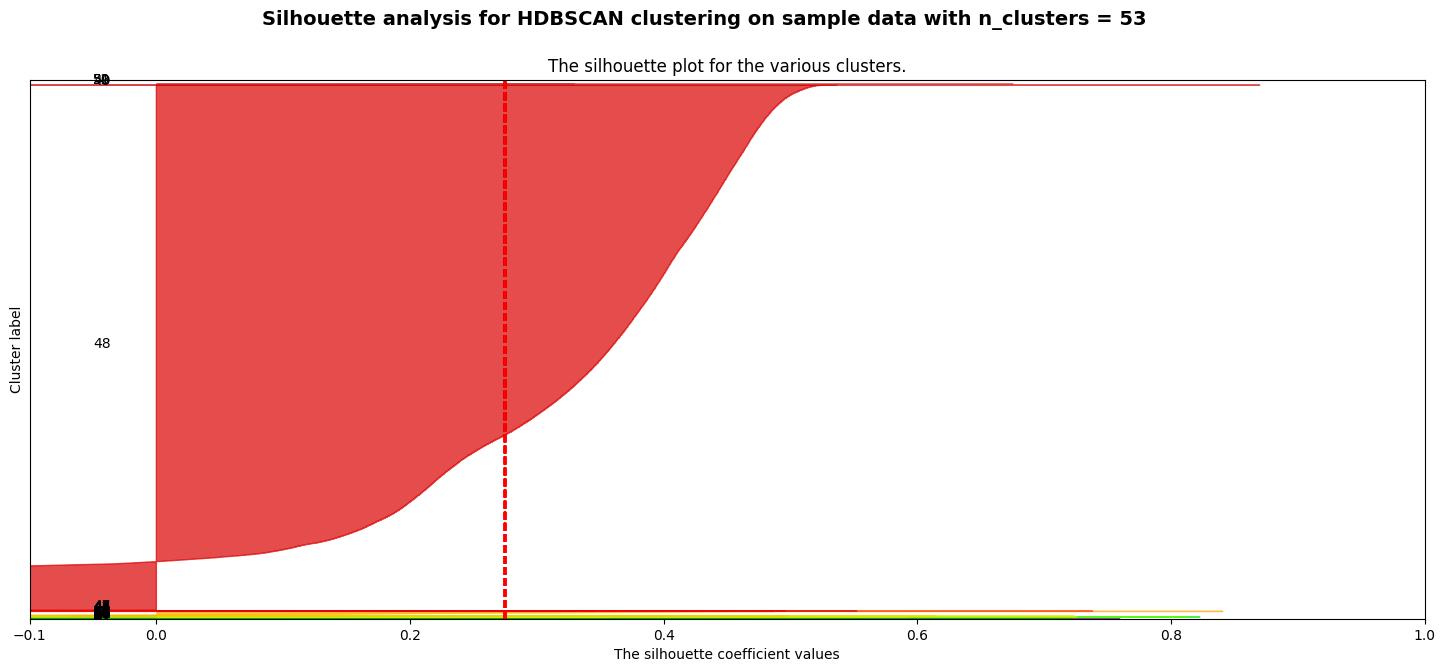

In [8]:
clustered_data = pd.read_csv("clustered_data.csv")
silhouette_df = pd.read_csv("silhouette_df.csv")

sillhouette_avg = silhouette_df.iloc[53].iloc[1]
sillhouette_samples = clustered_data["Silhouette"].to_numpy()
clusters_nr = len(clustered_data["Cluster"].unique())
labels = clustered_data["Cluster"]


sil_Score(n_clusters = clusters_nr, data = clustered_data, labels = labels, sill_avg = sillhouette_avg, sill_sample = sillhouette_samples)

In [9]:
grouped_significant_df = significant_df.groupby("Cluster")
for cluster, data in grouped_significant_df:
    print(f"Cluster {cluster} - Significant Features (p < 0.05):")
    print(data[["Feature", "Statistic", "P-value", "Test type"]])   
    print("\n" + "="*50 + "\n")

Cluster -1 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
90                    Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
91                    Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
92                            BMI    72.648836   0.000000e+00  ANOVA, F-test
93            Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
94              Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
95   Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
96        FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
97            General_Health_Fair    58.598155   1.933977e-14    Chi-Squared
98            General_Health_Poor    56.295972   6.234300e-14    Chi-Squared
99       General_Health_Very Good    64.501253   9.647099e-16    Chi-Squared
100   Checkup_5 or more years ago    13.516137   2.365207e-04    Chi-Squared
101  Checkup_Within the past y

In [10]:
print(silhouette_df[["Cluster","Average_Silhouette","Data Points"]].sort_values(by=["Average_Silhouette"],ascending=False).head())

   Cluster  Average_Silhouette  Data Points
50      49            0.825404           14
43      42            0.807259            6
34      33            0.778048            6
31      30            0.758110            6
45      44            0.692212            7


In [11]:
print(silhouette_df[["Cluster","Average_Silhouette","Data Points"]].sort_values(by=["Average_Silhouette"],ascending=False))

    Cluster  Average_Silhouette  Data Points
50       49            0.825404           14
43       42            0.807259            6
34       33            0.778048            6
31       30            0.758110            6
45       44            0.692212            7
3         2            0.679306            5
39       38            0.669570            9
18       17            0.650901            6
14       13            0.645083            5
36       35            0.643940            5
26       25            0.634193            5
7         6            0.618495            5
33       32            0.610039            7
52       51            0.602735           15
9         8            0.558063            5
32       31            0.533196            7
40       39            0.496302           12
23       22            0.471738            5
48       47            0.467087           13
1         0            0.434683            7
12       11            0.432789           18
37       3

In [15]:
#print(silhouette_df[["Cluster","Average_Silhouette","Data Points"]].sort_values(by=["Average_Silhouette"],ascending=False
sil_filter = silhouette_df.loc[silhouette_df["Data Points"] > 20, ["Cluster", "Average_Silhouette", "Data Points"]].sort_values(by="Average_Silhouette", ascending=False)
print(sil_filter)

    Cluster  Average_Silhouette  Data Points
27       26            0.411958           34
46       45            0.337128           30
41       40            0.320342           28
17       16            0.312155           51
49       48            0.282593       301591
53  Overall            0.274894       308854
10        9            0.267339           21
19       18            0.250754           23
21       20            0.248741           51
44       43            0.243773          102
29       28            0.224584          103
13       12            0.210967           30
11       10            0.204461          103
47       46            0.191009          209
22       21            0.185517           39
28       27            0.167879          225
42       41            0.158267         2542
35       34            0.142446          173
51       50            0.097216          650
25       24            0.078206           61
38       37           -0.106651          293
0        -

In [16]:
print(sil_filter.head(5))

   Cluster  Average_Silhouette  Data Points
27      26            0.411958           34
46      45            0.337128           30
41      40            0.320342           28
17      16            0.312155           51
49      48            0.282593       301591


In [17]:
sil_filter = silhouette_df.loc[silhouette_df["Data Points"] > 20, ["Cluster", "Average_Silhouette", "Data Points"]].sort_values(by="Average_Silhouette", ascending=False)
chosen_5 = sil_filter["Cluster"].head(5).astype(int).tolist()


In [18]:
chosen_5

[26, 45, 40, 16, 48]

In [19]:
def signi_feature(cluster_number):
    filtered_significant_df = significant_df[significant_df['Cluster'].isin(cluster_number)]

    grouped_significant_df = filtered_significant_df.groupby("Cluster")
    for cluster, data in grouped_significant_df:
        print(f"Cluster {cluster} - Significant Features (p < 0.05):")
        print(data[["Feature", "Statistic", "P-value", "Test type"]])   
        print("\n" + "="*50 + "\n")

In [20]:
signi_feature([1])

Cluster 1 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
307                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
308                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
309                           BMI    72.648836   0.000000e+00  ANOVA, F-test
310           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
311             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
312  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
313       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test




In [21]:
signi_feature(chosen_5)

Cluster 16 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
248                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
249                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
250                           BMI    72.648836   0.000000e+00  ANOVA, F-test
251           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
252             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
253  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
254       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
255                      Sex_Male    13.372574   2.553307e-04    Chi-Squared
256            Age_Category_30-34     4.177390   4.096674e-02    Chi-Squared


Cluster 26 - Significant Features (p < 0.05):
                             Feature    Statistic        P-value  \
297                      Height_(cm)    15.142680  8.358357e-132   


In [22]:
def analys_cluster(cluster_nr):
    stat_num, df, stat_cat = [clustered_data[clustered_data["Cluster"] == cluster_nr].describe(),
               clustered_data[clustered_data["Cluster"] == cluster_nr],
               clustered_data[clustered_data["Cluster"] == cluster_nr].describe(include="bool")]
    return df,stat_num,stat_cat

Ex analys av cluster 0

In [23]:
df_0, stat_n_0, stat_cat_0 = analys_cluster(0)

In [24]:
df_0

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
96198,180.0,66.68,20.50,0.0,2.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,0,0.342158
158699,173.0,74.84,25.09,24.0,30.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.379338
186359,168.0,88.45,31.47,2.0,12.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.514334
209645,175.0,104.33,33.96,2.0,4.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,0,0.369522
263151,175.0,81.65,26.58,15.0,12.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,0,0.531806
270708,168.0,86.18,30.67,2.0,16.0,120.0,120.0,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0.529099
286101,183.0,72.57,21.70,4.0,30.0,120.0,120.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,0,0.376524


In [25]:
stat_n_0

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.0,7.0,7.000000
mean,174.571429,82.100000,27.138571,7.0,15.142857,120.0,120.0,0.0,0.434683
std,5.623082,12.467619,5.097736,9.0,11.246163,0.0,0.0,0.0,0.085580
min,168.000000,66.680000,20.500000,0.0,2.000000,120.0,120.0,0.0,0.342158
25%,170.500000,73.705000,23.395000,2.0,8.000000,120.0,120.0,0.0,0.373023
50%,175.000000,81.650000,26.580000,2.0,12.000000,120.0,120.0,0.0,0.379338
75%,177.500000,87.315000,31.070000,9.5,23.000000,120.0,120.0,0.0,0.521717
max,183.000000,104.330000,33.960000,24.0,30.000000,120.0,120.0,0.0,0.531806


In [26]:
stat_cat_0

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
unique,2,1,2,2,1,2,1,2,2,1,1,2,2,2,1,1,2,1,1,2,2,2,1,1,1,1,1,1,1,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,6,7,6,4,7,6,7,6,5,7,7,6,5,6,7,7,6,7,7,6,5,4,7,7,7,7,7,7,7,6,4


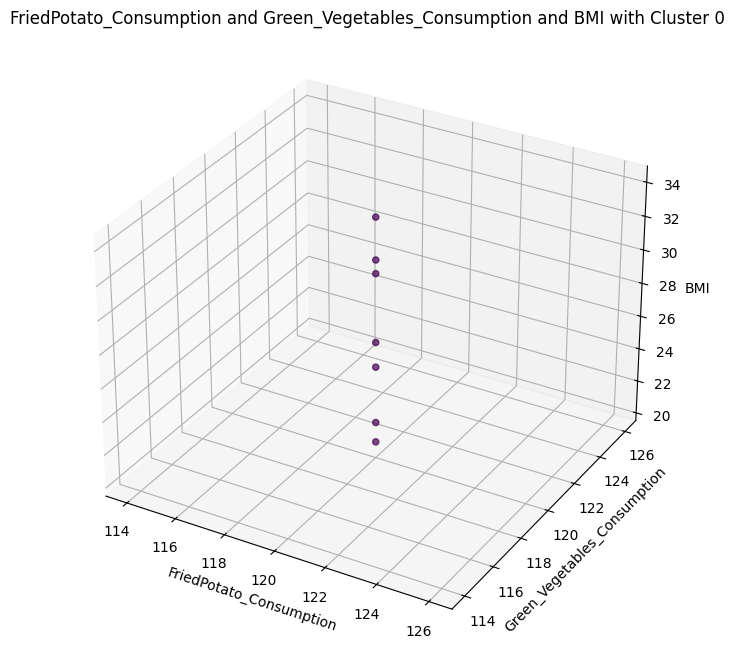

In [27]:
plot_3d("FriedPotato_Consumption","Green_Vegetables_Consumption","BMI",0)

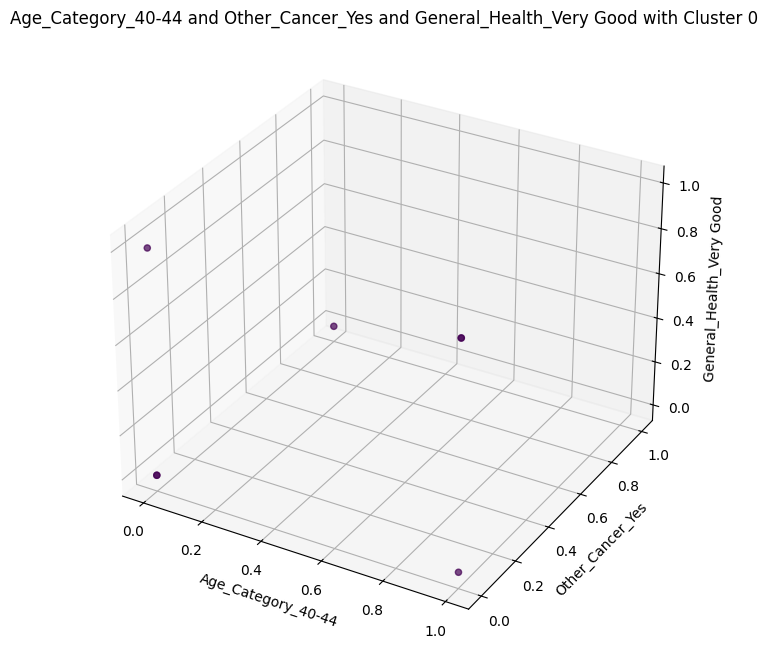

In [28]:
plot_3d("Age_Category_40-44","Other_Cancer_Yes","General_Health_Very Good",0)

Om vi kollar igenom datapunkterna för cluster 0 kan vi se att dem signifikanta pberoende variablerna framstår, 
- vi kan se att alla patienter har en speciell diet.
- dem äter väldigt mycket och majoriteten tränar.
- samt att deras hälsa är very good eller excellent.
- detta klustret innehåller oxå bara män
- en motgående faktor är att det finns en patient som är sjuk (cancer och Arthritis) 

In [49]:
def health_heatmap(df, columns):
    health_proportion = df[columns].apply(lambda x: x.value_counts(normalize=True).get(True, 0))

    # Plot the heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(health_proportion.to_frame().T, annot=True, cmap="coolwarm", cbar_kws={"label": "Proportion of True"})
    plt.title("Proportion of 'True'")
    plt.show()
    
def plot_dist(df,feature):
    health_distribution = df[feature].value_counts()

    # Plotting the distribution as a bar plot
    plt.figure(figsize=(8, 5))
    health_distribution.plot(kind="bar", color=["skyblue"])
    plt.title("Distribution in cluster")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

In [30]:
categorical_features = clustered_data.select_dtypes(include=['bool']).columns.tolist()
numerical_features = clustered_data.drop(categorical_features, axis=1).columns.tolist()

In [31]:
print(categorical_features)
print(numerical_features)
health_columns = categorical_features[:4]
print(health_columns)
checkup_column = categorical_features[4:8]
print(checkup_column)
conditions_columns = categorical_features[9:17]
print(conditions_columns)
profile_columns = [categorical_features[8], categorical_features[17], categorical_features[-1]]
print(profile_columns)
age_column = categorical_features[18:-1]
print(age_column)
food_column = numerical_features[3:-2]
print(food_column)
num_profile_column = numerical_features[:3]
print(num_profile_column)



['General_Health_Fair', 'General_Health_Good', 'General_Health_Poor', 'General_Health_Very Good', 'Checkup_5 or more years ago', 'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years', 'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes', 'Sex_Male', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Smoking_History_Yes']
['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Cluster', 'Silhouette']
['General_Health_Fair', 'General_Health_Good', 'General_Health_Poor', 'G

In [32]:
print(len(age_column))

12


In [33]:
chosen_5

[26, 45, 40, 16, 48]

In [34]:
def get_excellent_health(df):
    temp = df
    count_false_health = temp[(temp['General_Health_Fair'] == False) & 
                              (temp['General_Health_Good'] == False) & 
                              (temp['General_Health_Very Good'] == False) & 
                              (temp['General_Health_Poor'] == False)].shape[0]
    print(f"General_Health_Excellent: {count_false_health}")
    
def get_18_24_age(df):
    temp = df
    count_false = temp[(temp[age_column[0]] == False) & 
                        (temp[age_column[1]] == False) & 
                        (temp[age_column[2]] == False) & 
                        (temp[age_column[3]] == False) & 
                        (temp[age_column[4]] == False) & 
                        (temp[age_column[5]] == False) & 
                        (temp[age_column[6]] == False) & 
                        (temp[age_column[7]] == False) & 
                        (temp[age_column[8]] == False) &
                        (temp[age_column[9]] == False) &
                        (temp[age_column[10]] == False) &
                        (temp[age_column[11]] == False)].shape[0]
    print(f"Age_Category_18_24: {count_false}")
    

def get_Checkup_(df):
    temp = df
    count_false = temp[(temp["Checkup_Within the past year"] == False) & 
                        (temp["Checkup_Within the past year"] == False) & 
                        (temp["Checkup_Within the past 5 years"] == False) & 
                        (temp["Checkup_5 or more years ago"] == False)].shape[0]
    print(f"Checkup_never: {count_false}")

In [67]:
def plot_bmi_cate(df):
    """plot bmi categorized
    bmi < 18.5:         Underweight
    18.5 <= bmi < 24.9: Normal weight
    25.0 <= bmi < 29.9: Overweight
    29.9 <  bmi:        Obesity
    Args:
        df (pd.Dataframe): with BMi
    """
    
    def categorize_bmi(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 24.9:
            return 'Normal weight'
        elif 25.0 <= bmi < 29.9:
            return 'Overweight'
        else:
            return 'Obesity'

    x = df
    
    # Apply categorization to the DataFrame
    x.loc[:, "BMI_Category"] = x["BMI"].apply(categorize_bmi)

    # Plot the distribution of BMI categories
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='BMI_Category', hue='BMI_Category', palette="viridis", order=['Underweight', 'Normal weight', 'Overweight', 'Obesity'], legend=False)
    plt.xlabel('BMI Category')
    plt.ylabel('Count')
    plt.title('Distribution of BMI Categories')
    plt.show()

In [35]:
top_5_cluster_info = []

for cluster in chosen_5:
    top_5_cluster_info.append(analys_cluster(cluster))

In [36]:
print(len(top_5_cluster_info),len(top_5_cluster_info[0]))

5 3


In [39]:
signi_feature([chosen_5[0]])

Cluster 26 - Significant Features (p < 0.05):
                             Feature    Statistic        P-value  \
297                      Height_(cm)    15.142680  8.358357e-132   
298                      Weight_(kg)    56.629510   0.000000e+00   
299                              BMI    72.648836   0.000000e+00   
300              Alcohol_Consumption    24.564470  1.298130e-232   
301                Fruit_Consumption   977.070320   0.000000e+00   
302     Green_Vegetables_Consumption  1714.322836   0.000000e+00   
303          FriedPotato_Consumption  2375.222546   0.000000e+00   
304  Checkup_Within the past 2 years     5.382296   2.034209e-02   
305                    Arthritis_Yes     9.942411   1.615138e-03   
306              Smoking_History_Yes     4.826668   2.802274e-02   

         Test type  
297  ANOVA, F-test  
298  ANOVA, F-test  
299  ANOVA, F-test  
300  ANOVA, F-test  
301  ANOVA, F-test  
302  ANOVA, F-test  
303  ANOVA, F-test  
304    Chi-Squared  
305    Chi-Squar

ANOVA, F-test Results:

- The continuous features like Height_(cm), Weight_(kg), BMI, Alcohol Consumption, Fruit Consumption, Green Vegetables Consumption, and Fried Potato Consumption all show highly significant F-statistics and extremely low p-values.
- These large F-statistics indicate that these individuals in Cluster 26 have distinct patterns in physical characteristics and dietary habits compared to other clusters, possibly pointing to notable lifestyle or nutritional trends within this group.


Chi-Squared Test Results:

- Checkup Within the Past 2 Years: This has a p-value of 0.0203, suggesting a statistically significant association between the frequency of checkups and this cluster, possibly indicating that individuals in Cluster 26 may prioritize regular health checkups.
- Arthritis_Yes: With a p-value of 0.0016, arthritis status is significantly associated with Cluster 26, which might suggest a higher prevalence of arthritis within this group.
- Smoking History_Yes: The p-value of 0.028 suggests a significant relationship between smoking history and Cluster 26. This implies that smoking may be more common in this cluster or have a unique association within it.

Summary: 
- Cluster 26 appears to have unique characteristics that distinguish it from other clusters, particularly regarding physical attributes, dietary habits, and certain health conditions or behaviors like regular checkups, arthritis, and smoking history.

In [40]:
top_5_cluster_info[0][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
12022,168.0,68.04,24.21,0.0,60.0,60.0,60.0,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,26,0.543088
19133,157.0,65.77,26.52,8.0,60.0,60.0,60.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,26,0.427376
22605,157.0,72.57,29.26,0.0,50.0,50.0,50.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,26,0.265166
24306,157.0,95.25,38.41,0.0,60.0,60.0,60.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,26,0.235539
25184,155.0,49.90,20.77,0.0,60.0,60.0,60.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,26,0.316943
38427,168.0,86.18,30.67,2.0,60.0,60.0,60.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,26,0.417300
41753,180.0,74.84,23.01,0.0,60.0,60.0,60.0,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,26,0.429955
73240,160.0,77.11,30.11,0.0,60.0,60.0,60.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,26,0.483380
74972,157.0,58.97,23.78,1.0,60.0,60.0,60.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,26,0.418864
103421,168.0,58.97,20.98,4.0,60.0,60.0,60.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,26,0.475140


In [41]:
top_5_cluster_info[0][1]
#låg friedpotato consumption, 

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000
mean,166.794118,73.015294,26.338529,2.029412,59.705882,59.705882,59.705882,26.0,0.411958
std,7.846170,13.910438,5.142117,3.613823,1.714986,1.714986,1.714986,0.0,0.104831
min,155.000000,49.900000,15.780000,0.000000,50.000000,50.000000,50.000000,26.0,0.105913
25%,160.000000,63.615000,23.017500,0.000000,60.000000,60.000000,60.000000,26.0,0.337196
50%,168.000000,73.705000,25.350000,0.000000,60.000000,60.000000,60.000000,26.0,0.436983
75%,173.000000,81.082500,30.162500,2.000000,60.000000,60.000000,60.000000,26.0,0.482323
max,183.000000,104.330000,38.410000,12.000000,60.000000,60.000000,60.000000,26.0,0.545864


In [42]:
top_5_cluster_info[0][0]["Green_Vegetables_Consumption"].value_counts()

Green_Vegetables_Consumption
60.0    33
50.0     1
Name: count, dtype: int64

In [43]:
chosen_5

[26, 45, 40, 16, 48]

In [61]:
def histplot(column,df):
    plt.figure(figsize=(12, 8))
    for col in column:
        sns.histplot(df[col], kde=True, label=col, bins=15, alpha=0.80)

    plt.title("Distribution of Features (Histogram)")
    plt.xlabel("Consumption Level")
    plt.ylabel("Frequency")
    plt.legend(title="Food Type")
    plt.show()

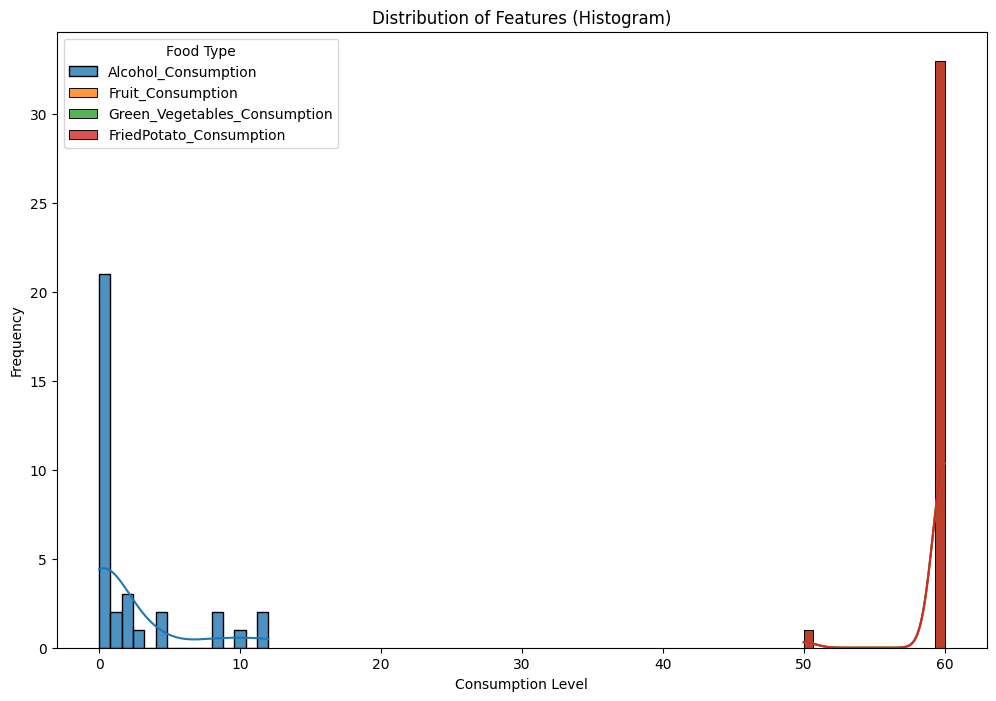

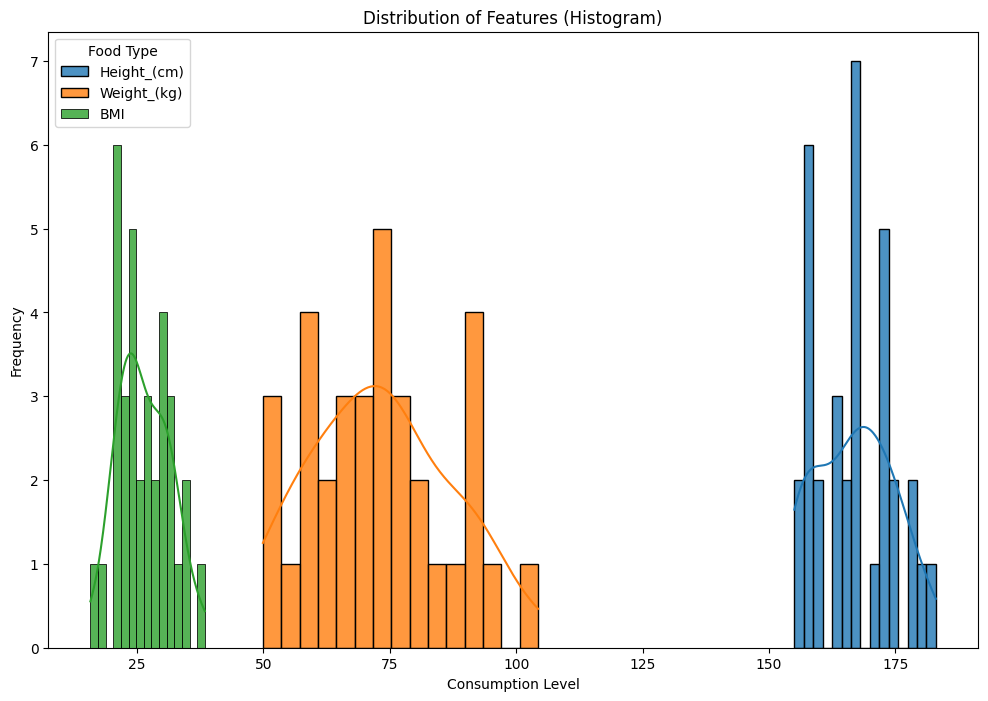

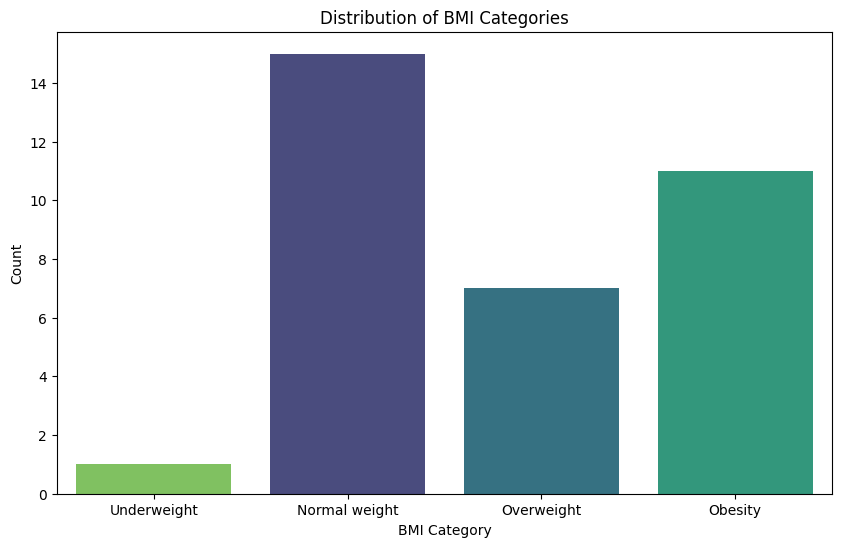

In [68]:
histplot(food_column,top_5_cluster_info[0][0])
histplot(num_profile_column,top_5_cluster_info[0][0])
plot_bmi_cate(top_5_cluster_info[0][0])

This descriptive summary for Cluster 26 reveals several key insights about the physical characteristics, dietary habits, and consistency of silhouette scores within this group:

Physical Characteristics:

- Height: The average height is 166.8 cm, with a standard deviation of 7.8 cm, indicating moderate variability. Heights range from 155 cm to 183 cm.
- Weight: The mean weight is 73 kg, with a relatively high standard deviation of 13.9 kg, suggesting a broader range of weights (49.9 kg to 104.3 kg). This could reflect a mix of body compositions.
- BMI: The average BMI is 26.3, slightly above the general healthy range, indicating a tendency toward overweight within this cluster. The BMI values range from 15.78 (underweight) to 38.41 (obese), highlighting diversity in body composition.

Dietary Habits:

- Alcohol Consumption: The mean is 2.03, but with a high standard deviation of 3.61 and a maximum of 12. This wide range suggests variability, with many individuals likely consuming no alcohol (median of 0).
- Fruit, Green Vegetable, and Fried Potato Consumption: The averages for these are all around 59.7, with a very low standard deviation (1.7). Given the range is between 50 and 60, this points to a consistent pattern of high consumption in these categories across most 
- individuals in the cluster. This consistency may reflect unique dietary habits within Cluster 26, where high consumption of these foods is common.

Summary:
- Cluster 26 represents individuals who have relatively diverse body characteristics (especially in BMI and weight) and consistent dietary patterns with high intake of fruits, green vegetables, and fried potatoes. The moderate silhouette score supports a distinct but not
- highly compact grouping, meaning individuals are relatively close to their cluster center but with some variability. This mix of dietary consistency and body composition variability could reflect a group with similar nutritional habits but diverse physical outcomes.

In [71]:
top_5_cluster_info[0][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
unique,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,31,29,33,27,34,25,33,24,25,32,31,33,32,32,31,34,32,19,30,30,31,30,29,32,31,28,33,33,34,34,27


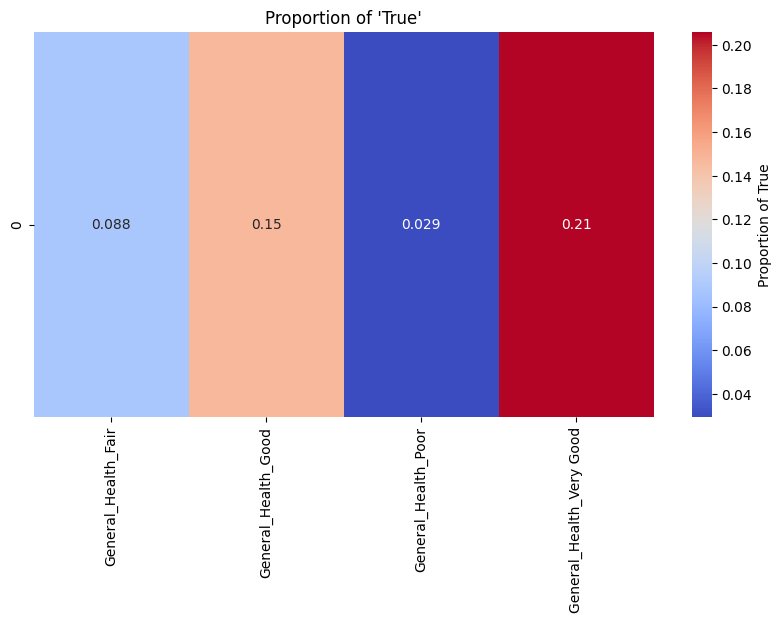

General_Health_Excellent: 18
General_Health_Fair         3
General_Health_Good         5
General_Health_Poor         1
General_Health_Very Good    7
dtype: int64


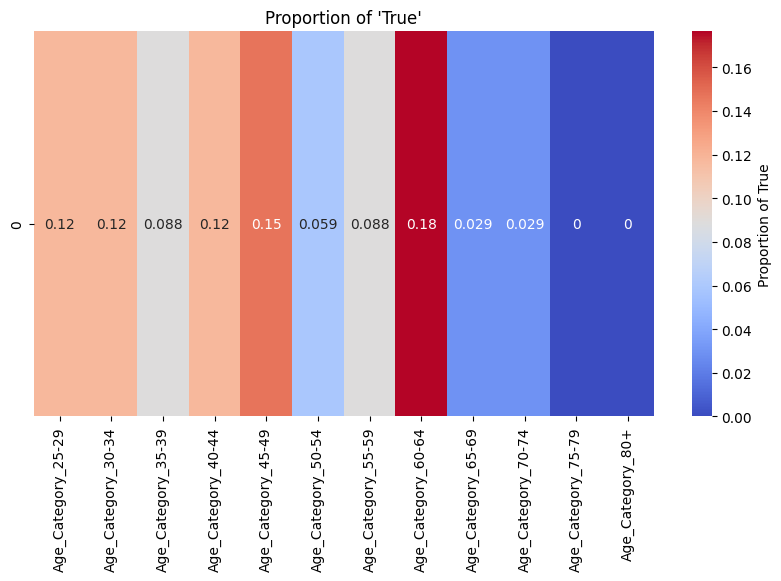

Age_Category_18_24: 1
Age_Category_25-29    4
Age_Category_30-34    4
Age_Category_35-39    3
Age_Category_40-44    4
Age_Category_45-49    5
Age_Category_50-54    2
Age_Category_55-59    3
Age_Category_60-64    6
Age_Category_65-69    1
Age_Category_70-74    1
Age_Category_75-79    0
Age_Category_80+      0
dtype: int64


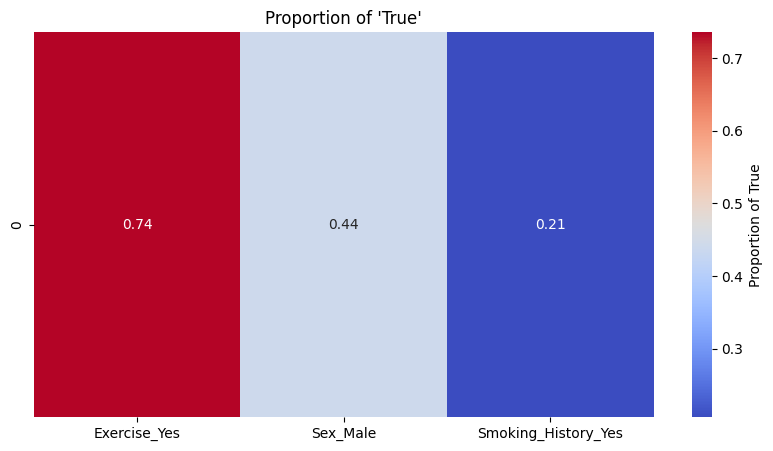

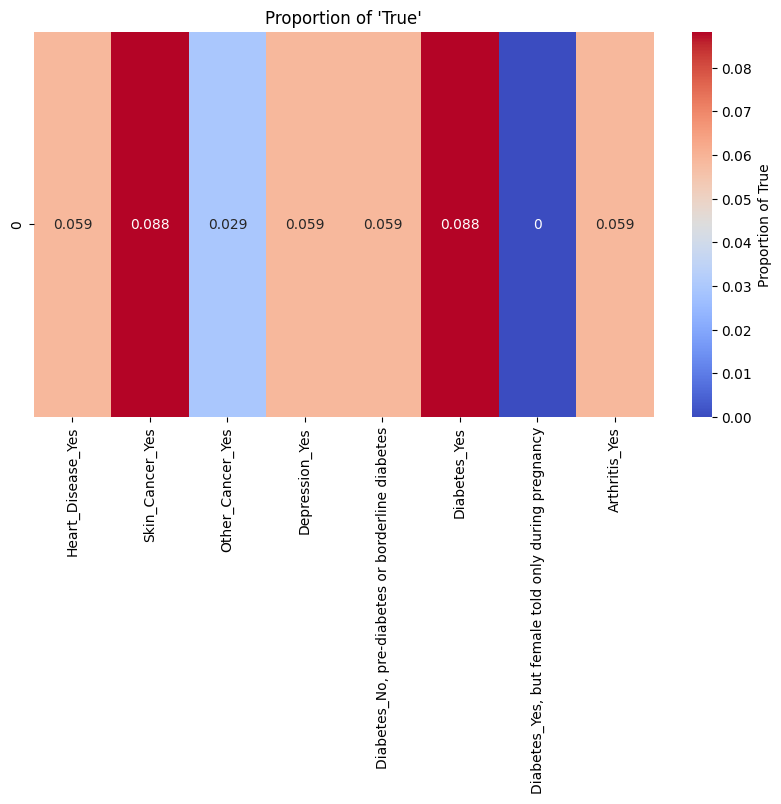

In [69]:
health_heatmap(top_5_cluster_info[0][0],health_columns)
get_excellent_health(top_5_cluster_info[0][0])
print(top_5_cluster_info[0][0][health_columns].sum())
health_heatmap(top_5_cluster_info[0][0],age_column)
get_18_24_age(top_5_cluster_info[0][0])
print(top_5_cluster_info[0][0][age_column].sum())
health_heatmap(top_5_cluster_info[0][0],profile_columns)
health_heatmap(top_5_cluster_info[0][0],conditions_columns)
#quite evenly distrubuted

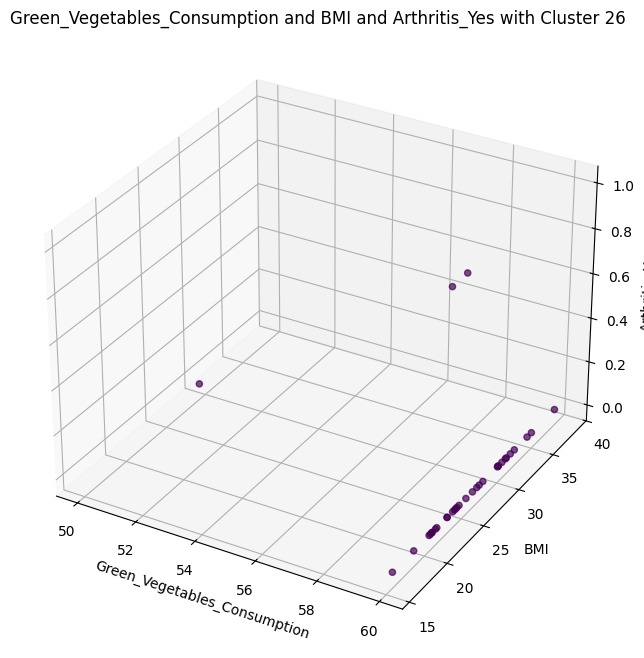

In [54]:
plot_3d("Green_Vegetables_Consumption","BMI","Arthritis_Yes",chosen_5[0])

This cluster suggest that majority of patient
- exercise (530 true) and had a checkup within the past year (501)
- This cluster also seems to be on a diet, most patient consume a lot of greens and majorite has a low alcohol consumption.
- we can also se that most people consider them self to have good or very good general health
- there is also more females than males (59%)
- there is also a quite high freq of Arthritis in this cluster

Overall Interpretation
The significant features for Cluster 50 indicate a distinct profile characterized by:

- Higher Consumption: Individuals in this cluster tend to have higher consumption of fruits, vegetables, and potentially lower fried food consumption.
- Health Indicators: There is a significant association with better general health and a higher prevalence of health issues such as arthritis and skin cancer.
- Demographic Profile: The cluster may be skewed towards a specific age group and gender (higher proportion of males).
- These findings suggest that Cluster 50 represents a group with unique health and dietary patterns, which could have implications for targeted health interventions or further research into lifestyle factors contributing to their health outcomes.

In [344]:
signi_feature([chosen_5[1]])

Cluster 43 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
153                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
154                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
155                           BMI    72.648836   0.000000e+00  ANOVA, F-test
156           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
157             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
158  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
159       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
160             Heart_Disease_Yes     6.007085   1.424855e-02    Chi-Squared
161            Age_Category_50-54     4.401420   3.590902e-02    Chi-Squared




In [70]:
top_5_cluster_info[1][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
15526,165.0,62.60,22.96,0.0,40.0,90.0,30.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,45,0.414451
15786,168.0,104.33,37.12,1.0,30.0,90.0,30.0,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,45,0.216737
21513,175.0,92.99,30.27,4.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,45,0.375111
23246,163.0,62.14,23.52,0.0,30.0,90.0,30.0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,45,0.316271
27176,178.0,65.77,20.81,0.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,45,0.390094
27854,180.0,77.11,23.71,2.0,20.0,90.0,30.0,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,45,0.213204
48942,168.0,61.23,21.79,2.0,30.0,80.0,32.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,45,0.289078
57202,168.0,58.97,20.98,0.0,30.0,90.0,30.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,45,0.309559
62117,175.0,74.84,24.37,0.0,30.0,90.0,30.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,45,0.487358
66790,168.0,70.31,25.02,2.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,45,0.456581


In [346]:
top_5_cluster_info[1][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,102.000000,102.000000,102.000000,102.000000,102.0,102.000000,102.000000,102.0,102.000000
mean,169.852941,78.884706,27.434510,1.686275,60.0,16.107843,59.960784,43.0,0.243773
std,10.545889,12.833016,4.397588,2.560091,0.0,12.663901,0.396059,0.0,0.097556
min,152.000000,52.160000,18.010000,0.000000,60.0,0.000000,56.000000,43.0,-0.111606
25%,163.000000,68.040000,24.240000,0.000000,60.0,4.000000,60.000000,43.0,0.200486
50%,170.000000,79.380000,26.920000,0.000000,60.0,16.000000,60.000000,43.0,0.260551
75%,178.000000,89.132500,30.842500,4.000000,60.0,30.000000,60.000000,43.0,0.311473
max,196.000000,106.590000,37.760000,10.000000,60.0,40.000000,60.000000,43.0,0.414198


In [347]:
top_5_cluster_info[1][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,90,69,99,66,98,90,97,81,80,101,95,95,88,102,86,102,74,52,100,93,92,92,90,100,95,93,97,92,99,96,69


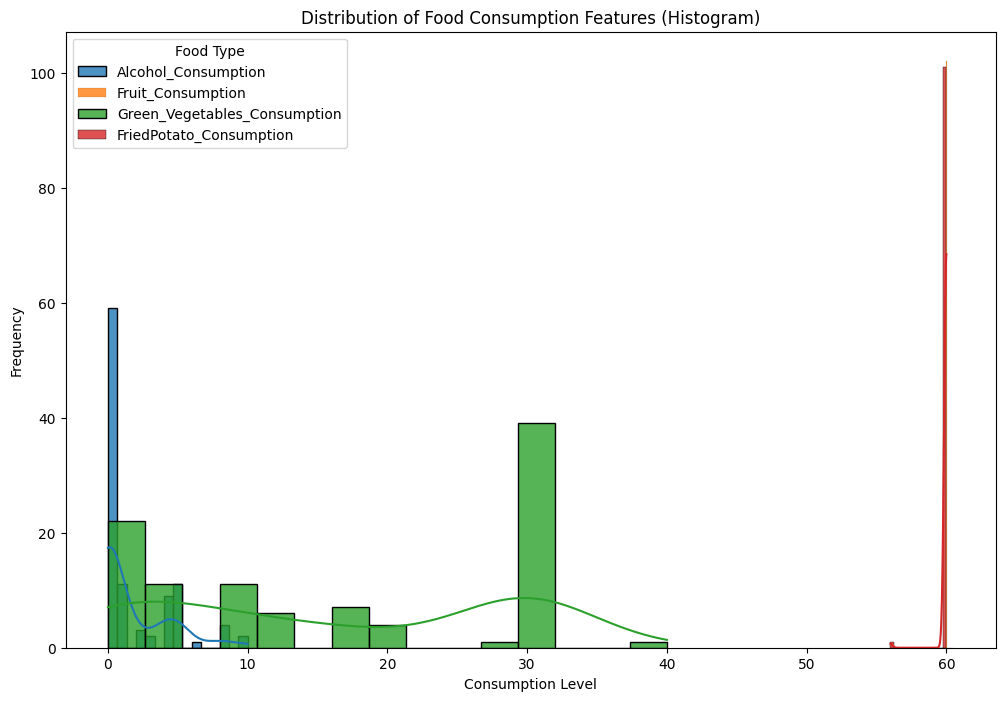

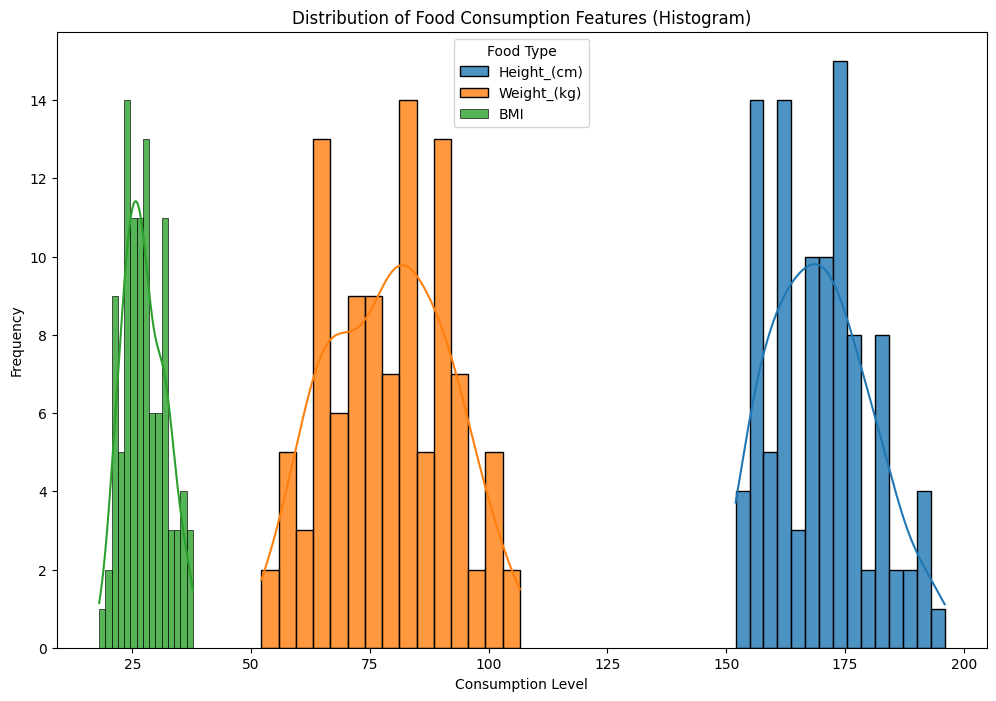

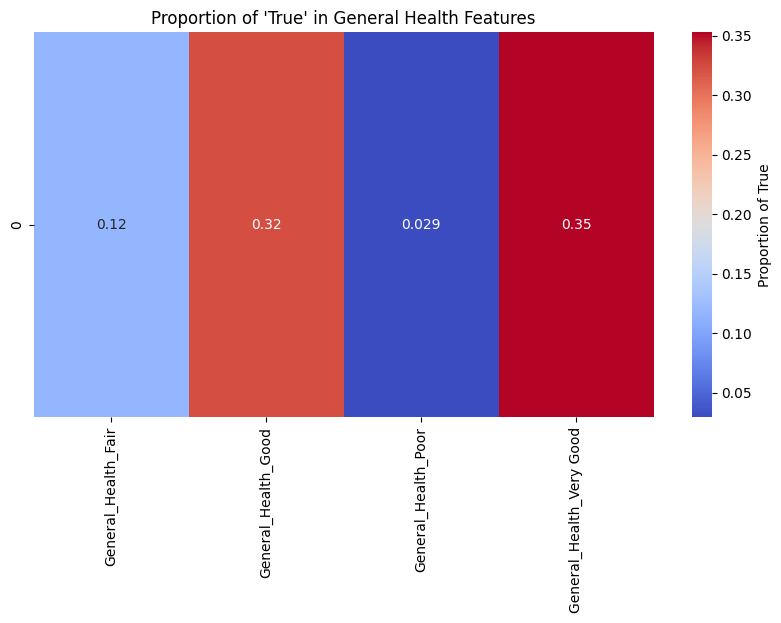

General_Health_Excellent: 18
General_Health_Fair         12
General_Health_Good         33
General_Health_Poor          3
General_Health_Very Good    36
dtype: int64


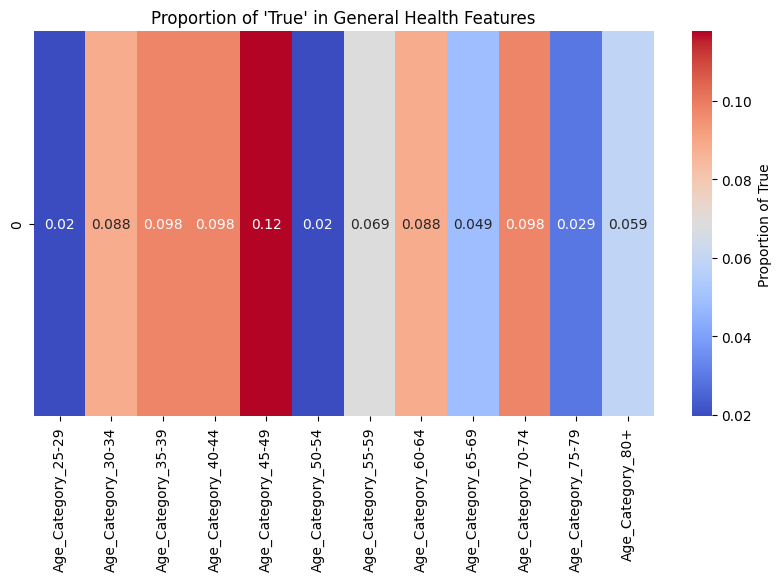

Age_Category_18_24: 17
Age_Category_25-29     2
Age_Category_30-34     9
Age_Category_35-39    10
Age_Category_40-44    10
Age_Category_45-49    12
Age_Category_50-54     2
Age_Category_55-59     7
Age_Category_60-64     9
Age_Category_65-69     5
Age_Category_70-74    10
Age_Category_75-79     3
Age_Category_80+       6
dtype: int64


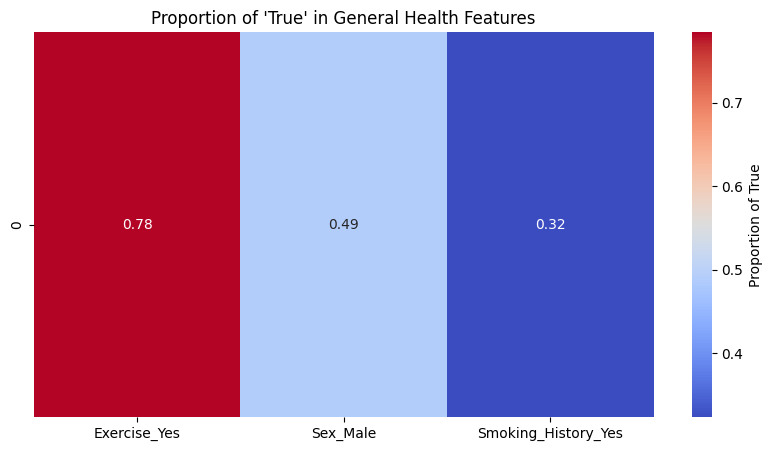

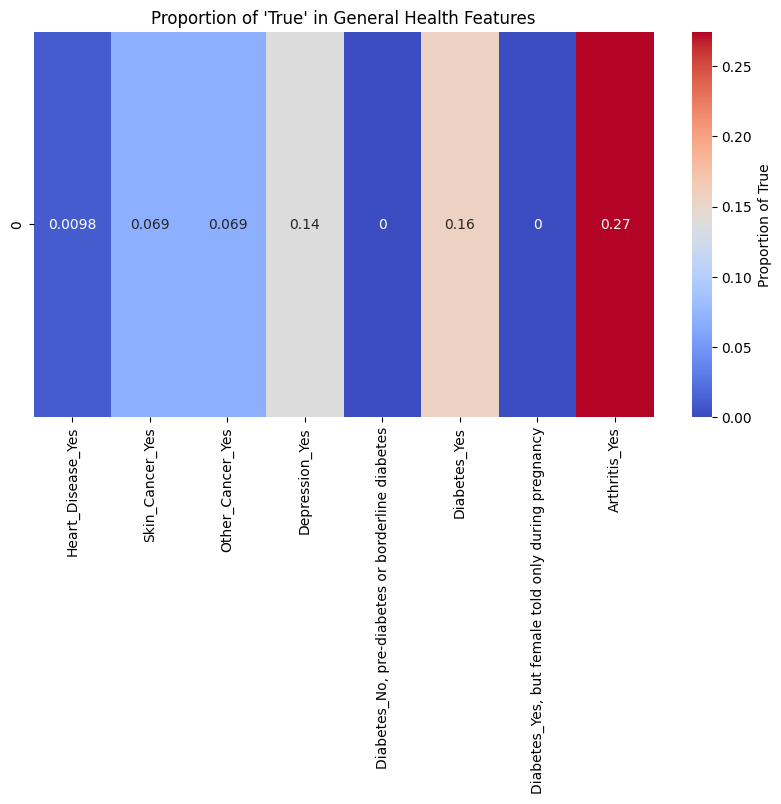

In [418]:
x = 1
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])
plot_bmi_cate

health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)






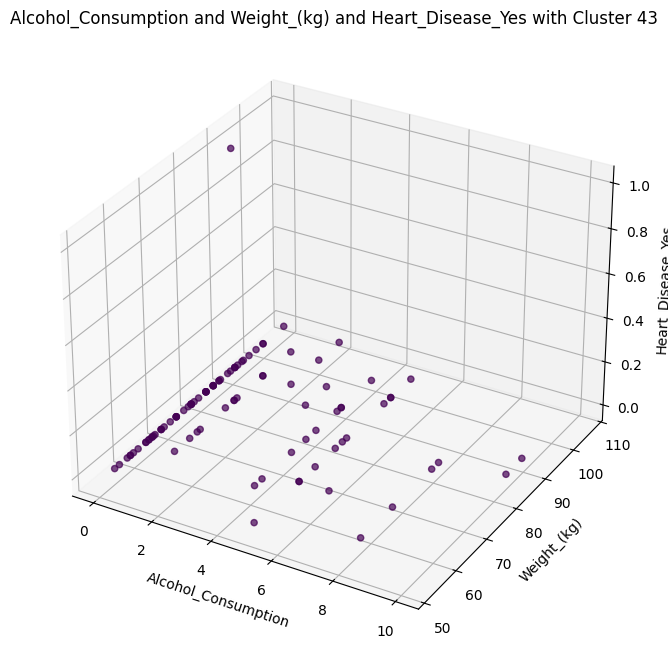

In [377]:
plot_3d("Alcohol_Consumption","Weight_(kg)","Heart_Disease_Yes",43)

Cluster 43 shows notable differentiation in terms of both body metrics and dietary habits, which are significantly distinct from other clusters. 
- The association with age (50-54) on further analysis we discover that this cluster represent patient between the age of 30-50 and 55-70
- there is a high dietery consumption of fruits and fried foods but low consumptions of vegetables and alchohol
- dispite a high fried food consumption there is a low association to hearth disease here.
- the majority of the patient also partake in exercise which might be why there is low association to hearth disease
- again also more females 60%
- majority also consider themselves healthy

In [392]:
signi_feature([top_5[2]])

Cluster 34 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
228                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
229                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
230                           BMI    72.648836   0.000000e+00  ANOVA, F-test
231           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
232             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
233  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
234       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
235           General_Health_Fair     5.155146   2.317759e-02    Chi-Squared
236           General_Health_Good     3.848187   4.979979e-02    Chi-Squared
237                  Exercise_Yes    23.145965   1.501579e-06    Chi-Squared
238                 Arthritis_Yes    11.710745   6.214024e-04    Chi-Squared
239                      Sex_M

In [393]:
top_5_cluster_info[2][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
1912,163.0,71.67,27.12,0.0,120.0,60.0,0.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,34,0.298723
4599,163.0,61.23,23.17,4.0,120.0,60.0,4.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,34,0.026642
7086,168.0,58.97,20.98,0.0,120.0,60.0,4.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,34,0.183592
8721,160.0,49.90,19.49,0.0,120.0,60.0,0.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,34,0.031186
9732,157.0,58.51,23.59,0.0,120.0,60.0,1.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,34,0.111286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303800,155.0,63.50,26.45,0.0,120.0,60.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,34,0.140210
305025,183.0,86.18,25.77,1.0,120.0,60.0,4.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,34,0.097197
305508,178.0,90.72,28.70,4.0,120.0,60.0,0.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,34,0.196626
306410,163.0,86.18,32.61,0.0,120.0,60.0,1.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,34,0.293808


In [394]:
top_5_cluster_info[2][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,173.000000,173.000000,173.000000,173.000000,173.0,173.0,173.000000,173.0,173.000000
mean,167.791908,72.055434,25.501618,1.369942,120.0,60.0,2.127168,34.0,0.142446
std,8.162773,13.910239,3.919123,2.372718,0.0,0.0,2.569049,0.0,0.175812
min,150.000000,48.990000,17.430000,0.000000,120.0,60.0,0.000000,34.0,-0.460181
25%,163.000000,61.690000,22.810000,0.000000,120.0,60.0,0.000000,34.0,0.063694
50%,168.000000,70.310000,25.020000,0.000000,120.0,60.0,1.000000,34.0,0.174865
75%,173.000000,81.650000,28.070000,2.000000,120.0,60.0,4.000000,34.0,0.283648
max,185.000000,104.330000,37.120000,12.000000,120.0,60.0,12.000000,34.0,0.358271


In [395]:
top_5_cluster_info[2][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,163,132,170,117,169,156,164,142,161,166,159,157,146,171,158,173,138,123,164,162,159,159,155,161,155,158,153,163,156,164,132


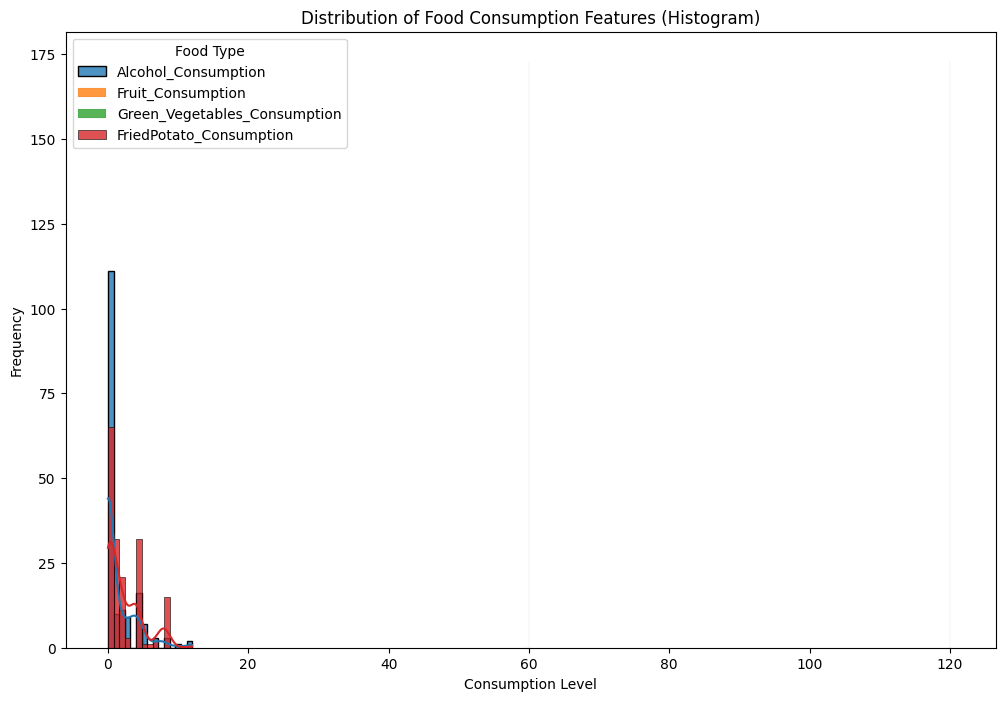

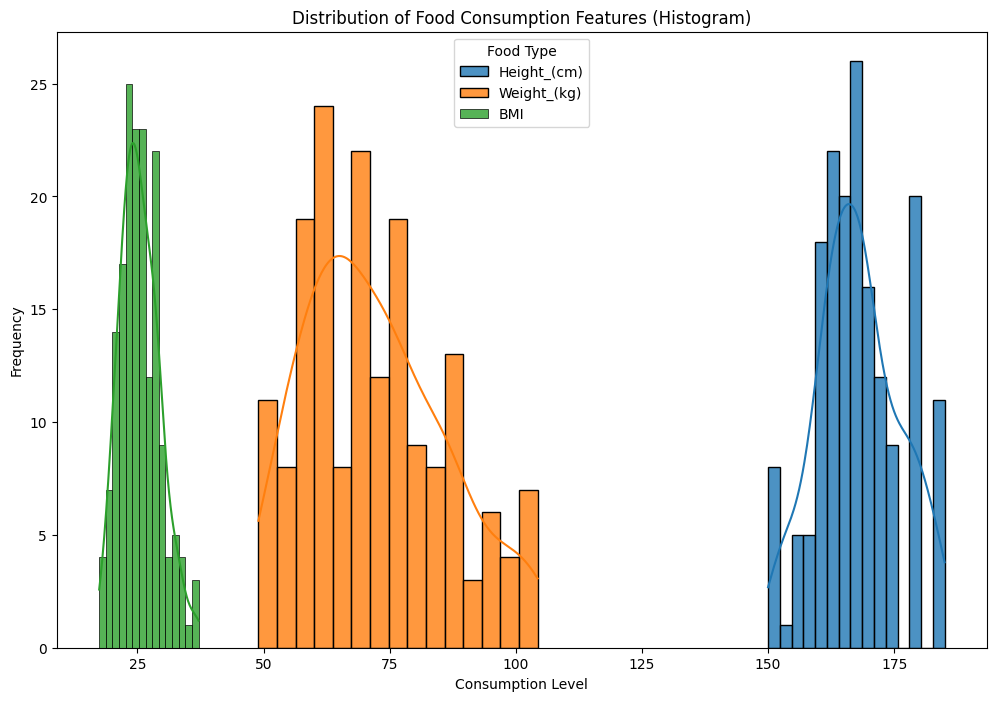

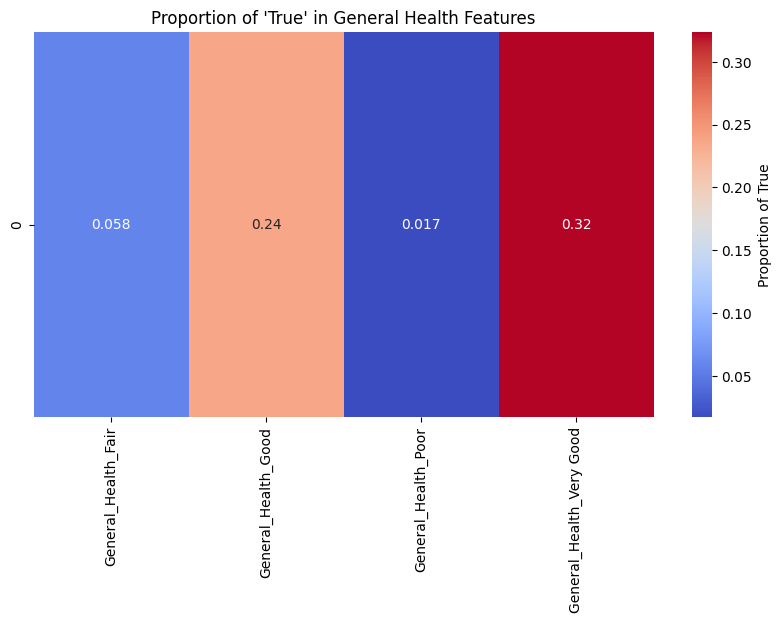

General_Health_Excellent: 63
General_Health_Fair         10
General_Health_Good         41
General_Health_Poor          3
General_Health_Very Good    56
dtype: int64


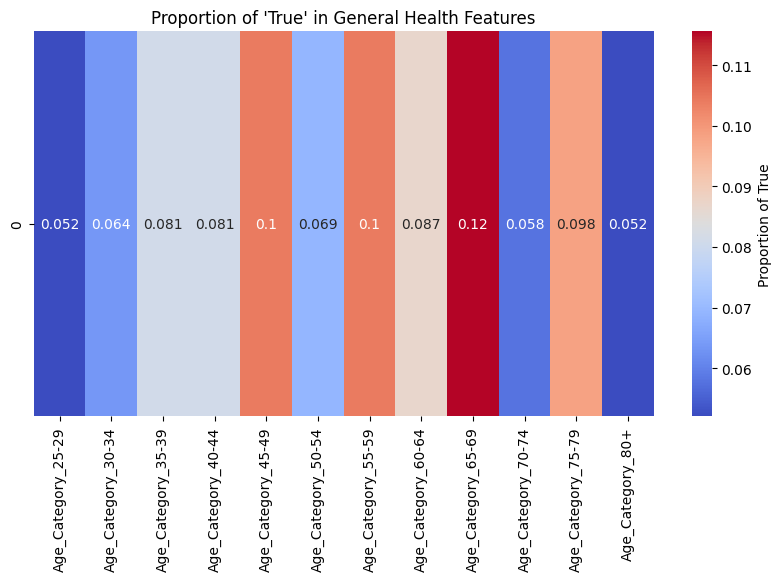

Age_Category_18_24: 6
Age_Category_25-29     9
Age_Category_30-34    11
Age_Category_35-39    14
Age_Category_40-44    14
Age_Category_45-49    18
Age_Category_50-54    12
Age_Category_55-59    18
Age_Category_60-64    15
Age_Category_65-69    20
Age_Category_70-74    10
Age_Category_75-79    17
Age_Category_80+       9
dtype: int64


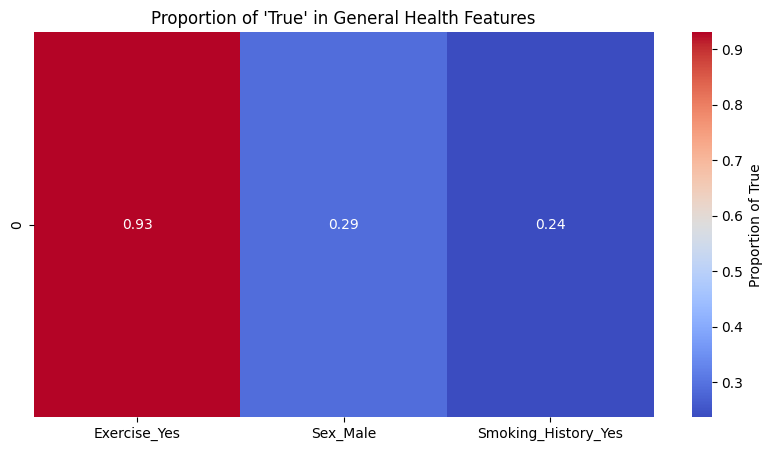

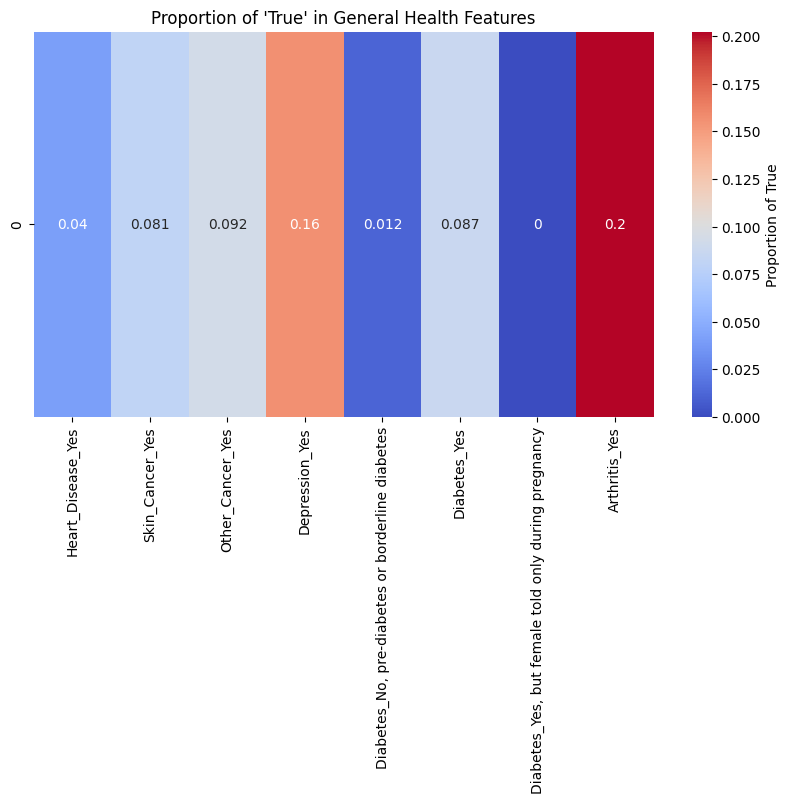

In [420]:
x = 2
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])

health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)




In [421]:
signi_feature([top_5[3]])

Cluster 31 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
440                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
441                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
442                           BMI    72.648836   0.000000e+00  ANOVA, F-test
443           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
444             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
445  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
446       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test




In [423]:
top_5_cluster_info[3][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
44166,180.0,76.20,23.43,3.0,90.0,90.0,20.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,31,0.278885
194046,183.0,90.72,27.12,0.0,90.0,90.0,30.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,31,0.631011
229995,173.0,90.72,30.41,4.0,90.0,90.0,30.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,31,0.426617
273178,183.0,90.72,27.12,4.0,90.0,90.0,30.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,31,0.639124
283304,178.0,80.74,25.54,2.0,90.0,90.0,30.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,31,0.497809
294673,183.0,83.91,25.09,1.0,90.0,90.0,30.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,31,0.636185
298486,180.0,83.91,25.80,4.0,90.0,90.0,30.0,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,31,0.622742


In [424]:
top_5_cluster_info[3][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.000000,7.0,7.000000
mean,180.000000,85.274286,26.358571,2.571429,90.0,90.0,28.571429,31.0,0.533196
std,3.651484,5.709530,2.188663,1.618347,0.0,0.0,3.779645,0.0,0.139463
min,173.000000,76.200000,23.430000,0.000000,90.0,90.0,20.000000,31.0,0.278885
25%,179.000000,82.325000,25.315000,1.500000,90.0,90.0,30.000000,31.0,0.462213
50%,180.000000,83.910000,25.800000,3.000000,90.0,90.0,30.000000,31.0,0.622742
75%,183.000000,90.720000,27.120000,4.000000,90.0,90.0,30.000000,31.0,0.633598
max,183.000000,90.720000,30.410000,4.000000,90.0,90.0,30.000000,31.0,0.639124


In [425]:
top_5_cluster_info[3][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
unique,1,2,1,2,2,2,1,2,2,1,1,2,1,1,2,1,2,2,1,2,2,1,2,1,1,2,1,1,1,2,2
top,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,7,6,7,4,6,6,7,5,4,7,7,6,7,7,6,7,5,6,7,6,6,7,6,7,7,5,7,7,7,6,5


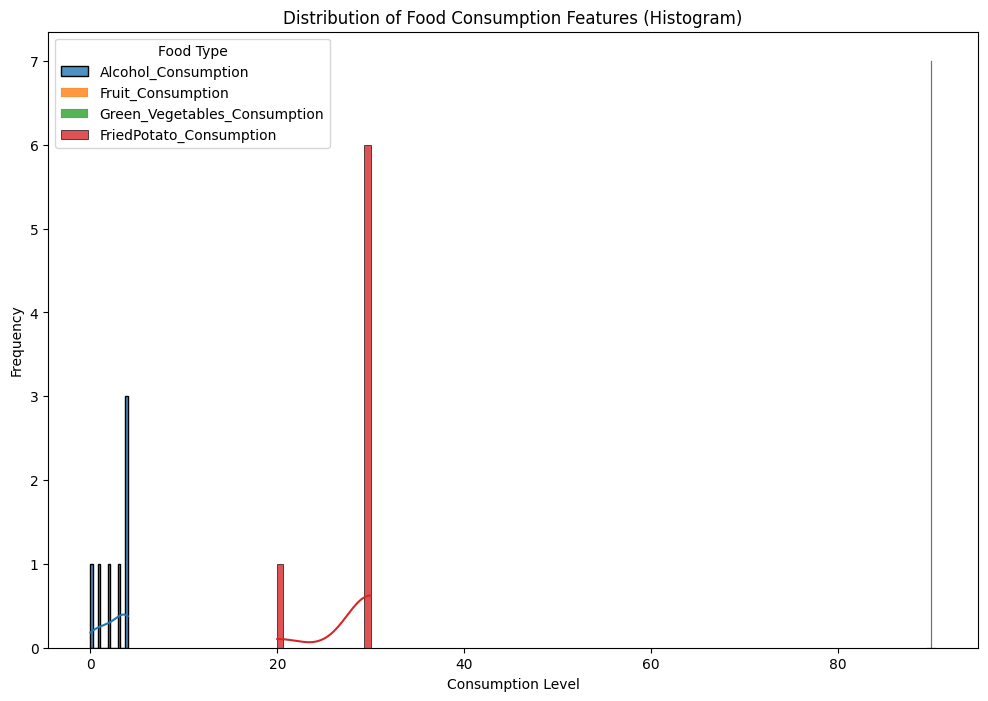

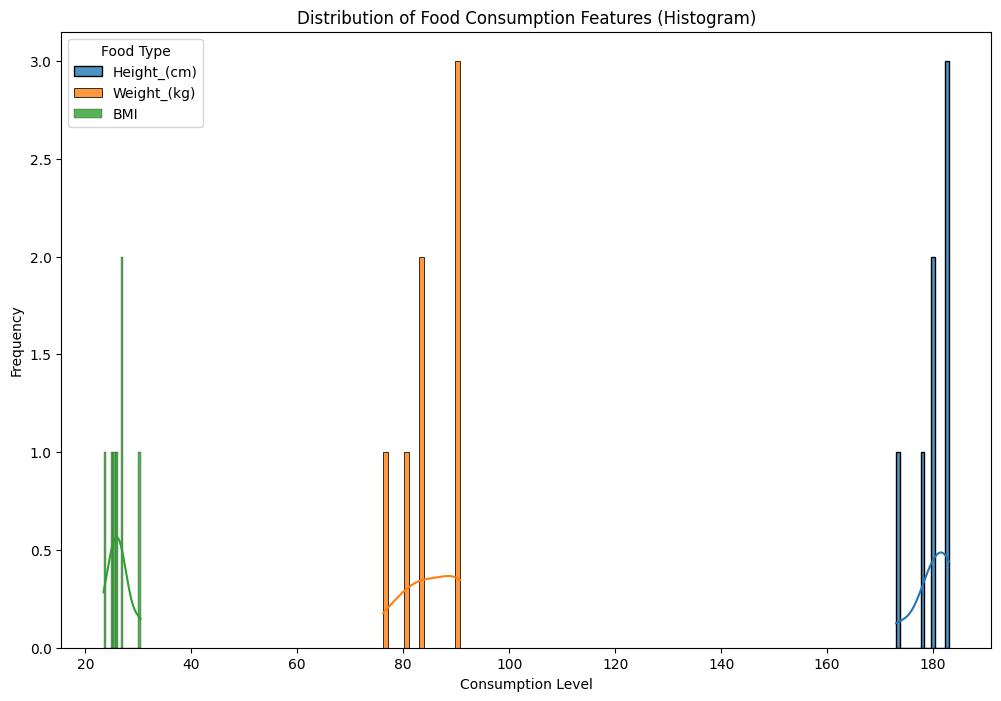

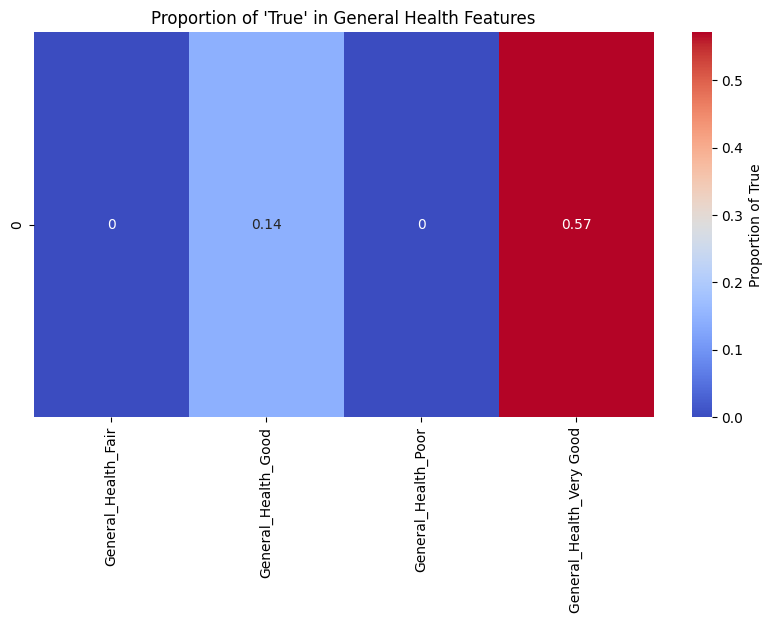

General_Health_Excellent: 2
General_Health_Fair         0
General_Health_Good         1
General_Health_Poor         0
General_Health_Very Good    4
dtype: int64


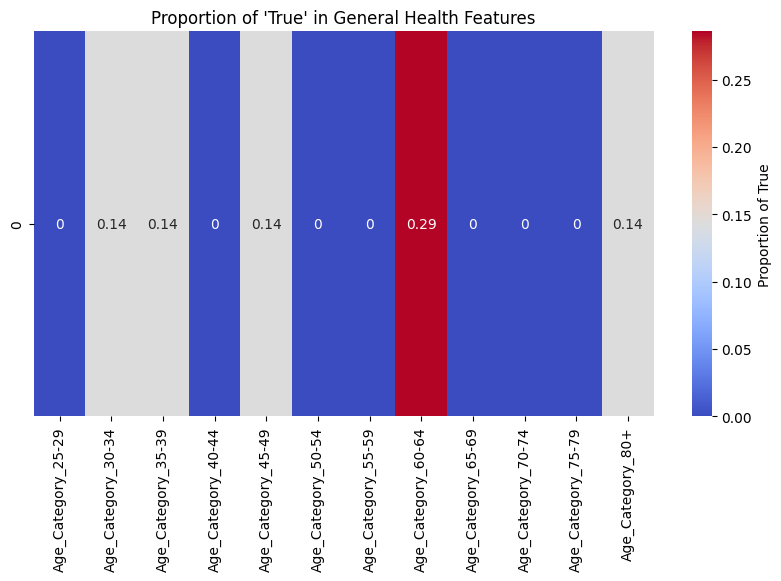

Age_Category_18_24: 1
Age_Category_25-29    0
Age_Category_30-34    1
Age_Category_35-39    1
Age_Category_40-44    0
Age_Category_45-49    1
Age_Category_50-54    0
Age_Category_55-59    0
Age_Category_60-64    2
Age_Category_65-69    0
Age_Category_70-74    0
Age_Category_75-79    0
Age_Category_80+      1
dtype: int64


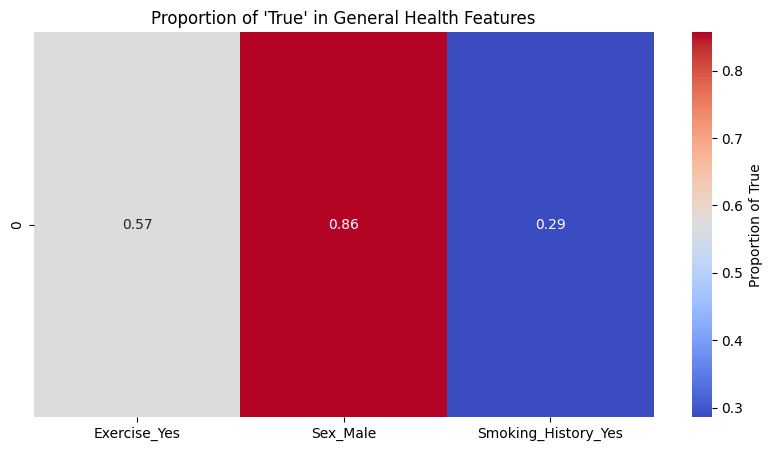

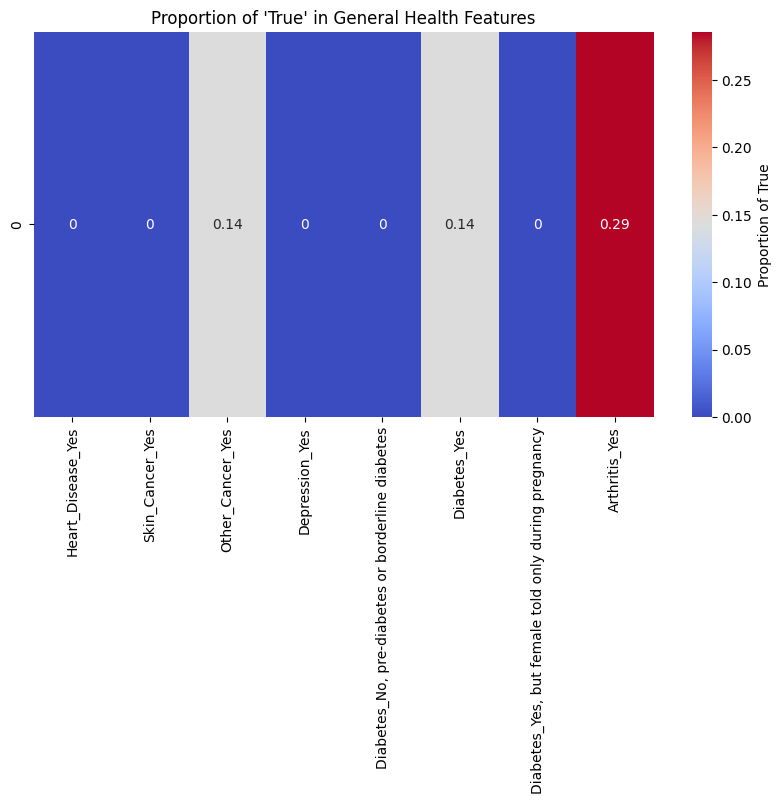

In [422]:
x = 3
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])

health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)

In [426]:
signi_feature([top_5[4]])

Cluster 45 - Significant Features (p < 0.05):
                                               Feature    Statistic  \
337                                        Height_(cm)    15.142680   
338                                        Weight_(kg)    56.629510   
339                                                BMI    72.648836   
340                                Alcohol_Consumption    24.564470   
341                                  Fruit_Consumption   977.070320   
342                       Green_Vegetables_Consumption  1714.322836   
343                            FriedPotato_Consumption  2375.222546   
344  Diabetes_Yes, but female told only during preg...     6.063914   

           P-value      Test type  
337  8.358357e-132  ANOVA, F-test  
338   0.000000e+00  ANOVA, F-test  
339   0.000000e+00  ANOVA, F-test  
340  1.298130e-232  ANOVA, F-test  
341   0.000000e+00  ANOVA, F-test  
342   0.000000e+00  ANOVA, F-test  
343   0.000000e+00  ANOVA, F-test  
344   1.379716e-02    Chi-

In [428]:
top_5_cluster_info[4][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
15526,165.0,62.60,22.96,0.0,40.0,90.0,30.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,45,0.414451
15786,168.0,104.33,37.12,1.0,30.0,90.0,30.0,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,45,0.216737
21513,175.0,92.99,30.27,4.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,45,0.375111
23246,163.0,62.14,23.52,0.0,30.0,90.0,30.0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,45,0.316271
27176,178.0,65.77,20.81,0.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,45,0.390094
27854,180.0,77.11,23.71,2.0,20.0,90.0,30.0,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,45,0.213204
48942,168.0,61.23,21.79,2.0,30.0,80.0,32.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,45,0.289078
57202,168.0,58.97,20.98,0.0,30.0,90.0,30.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,45,0.309559
62117,175.0,74.84,24.37,0.0,30.0,90.0,30.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,45,0.487358
66790,168.0,70.31,25.02,2.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,45,0.456581


In [429]:
top_5_cluster_info[4][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,169.466667,76.097333,26.507000,2.000000,29.733333,89.966667,30.066667,45.0,0.337128
std,5.757953,13.686103,4.526883,3.311422,4.160018,2.498045,0.365148,0.0,0.158392
min,160.000000,52.620000,20.550000,0.000000,16.000000,80.000000,30.000000,45.0,-0.335265
25%,165.000000,64.412500,23.377500,0.000000,30.000000,90.000000,30.000000,45.0,0.302071
50%,169.000000,72.570000,25.300000,0.000000,30.000000,90.000000,30.000000,45.0,0.360627
75%,174.500000,86.180000,29.587500,2.000000,30.000000,90.000000,30.000000,45.0,0.447625
max,180.000000,104.330000,37.280000,12.000000,40.000000,99.000000,32.000000,45.0,0.495647


In [430]:
top_5_cluster_info[4][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
unique,2,2,1,2,1,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,28,20,30,23,30,25,29,24,22,27,26,30,28,30,26,28,23,16,29,27,26,29,29,27,28,27,28,27,27,29,18


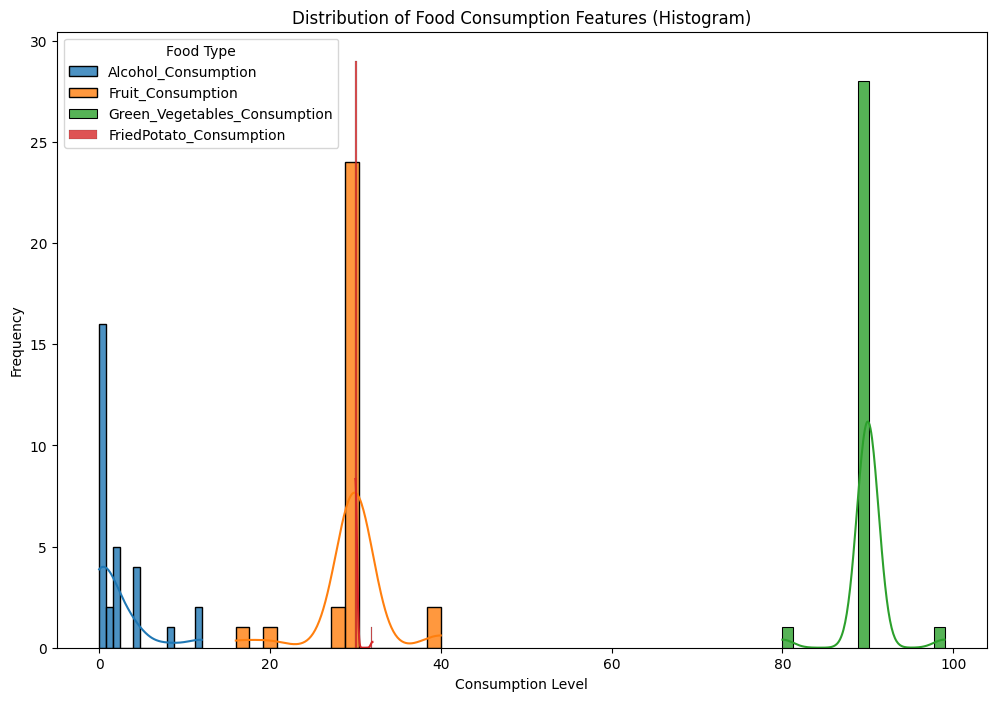

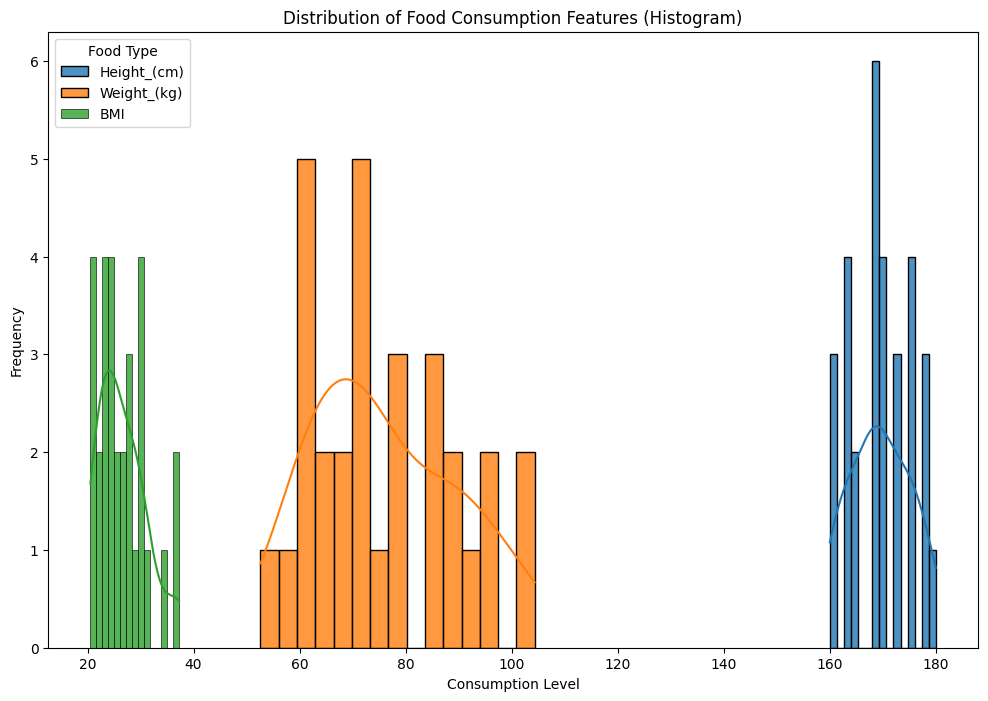

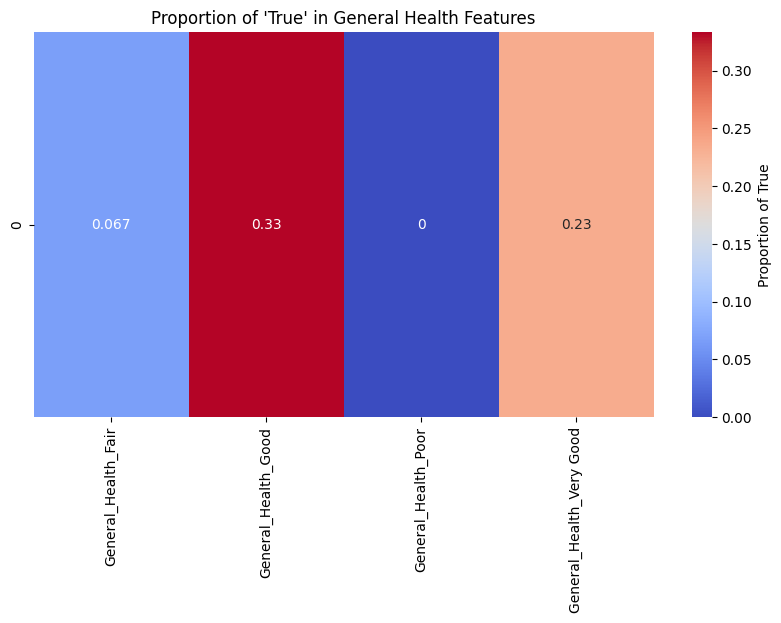

General_Health_Excellent: 11
General_Health_Fair          2
General_Health_Good         10
General_Health_Poor          0
General_Health_Very Good     7
dtype: int64


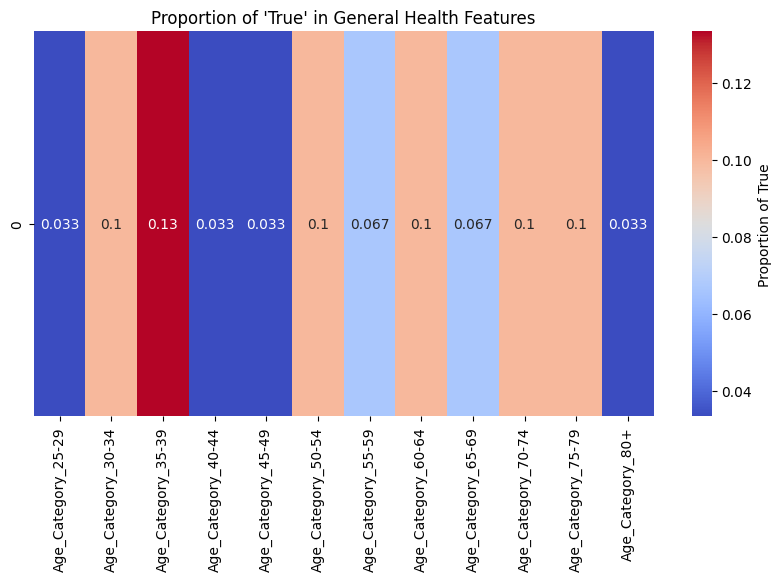

Age_Category_18_24: 3
Age_Category_25-29    1
Age_Category_30-34    3
Age_Category_35-39    4
Age_Category_40-44    1
Age_Category_45-49    1
Age_Category_50-54    3
Age_Category_55-59    2
Age_Category_60-64    3
Age_Category_65-69    2
Age_Category_70-74    3
Age_Category_75-79    3
Age_Category_80+      1
dtype: int64


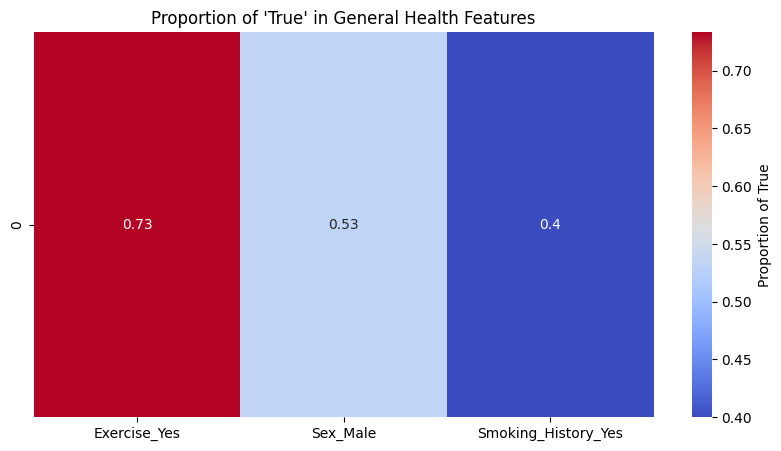

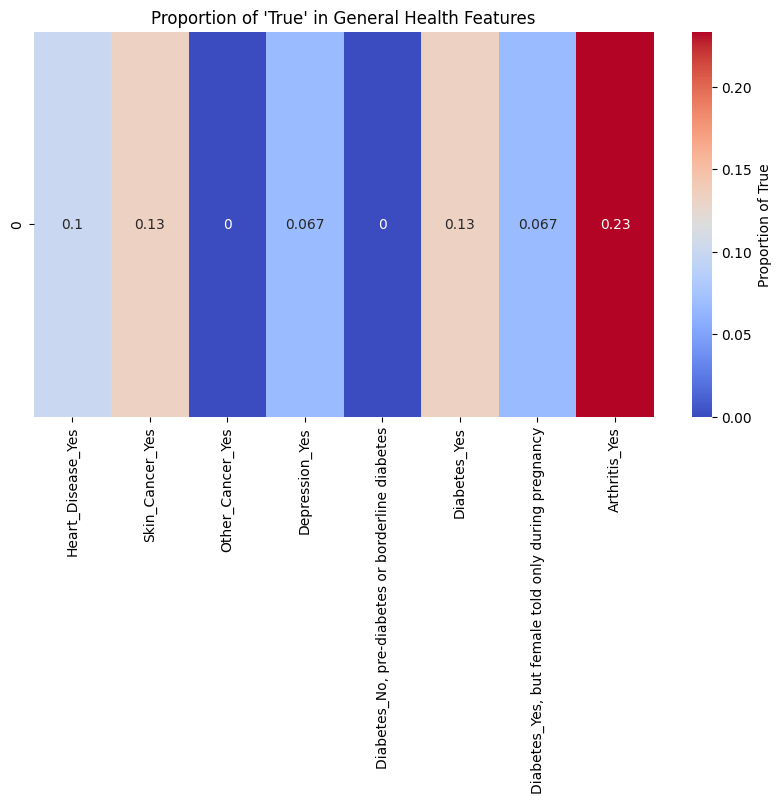

In [427]:
x = 4
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])

health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)